# Analyzing borrowers’ risk of defaulting

This is part of a project to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

**The objective of this project is to:**

  * Prepare a report for a bank's loan division by analyze a borrower's risk of defaulting.
  * Apply Data Preprocessing to a real-life analytical case study.
___

In [1]:
# Loading all the libraries
import numpy as np
import pandas as pd

#import imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#import visualization package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

print('Libraries loaded successfully!')


Libraries loaded successfully!


In [2]:
# Load the data
df=pd.read_csv('credit_scoring_eng.csv')
#duplicate data to keep original
df_int=df

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



### Data check


In [3]:
df.shape

(21525, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


From the initial look at the data we notice some data quality issues:
  * Minimum number of children is -1, this is unrealistic
  * Days employed and number of children has some negative values
  * Minimum age is 0
  * Missing values in the days_employed and total_income columns
  
The data will need preprocess and further analysis to improve quality

### Data Preprocessing

#### Check for duplicate data

In [6]:
#number of duplicate rows
df.duplicated().sum()

54

In [7]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
4182,1,NaN,34,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
7808,0,NaN,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8583,0,NaN,58,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,supplementary education
9238,2,NaN,34,secondary education,1,married,0,F,employee,0,NaN,buying property for renting out
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate
9627,0,NaN,56,secondary education,1,married,0,F,retiree,0,NaN,transactions with my real estate
10462,0,NaN,62,secondary education,1,married,0,F,retiree,0,NaN,buy commercial real estate


In [8]:
#drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#Inspect categorical data entries
for col in ['education_id', 'family_status', 'gender', 'education', 'income_type', 'children', 'purpose']:
    print(col, df[col].unique())
    print('\n\n')

education_id [0 1 2 3 4]



family_status ['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']



gender ['F' 'M' 'XNA']



education ["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']



income_type ['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']



children [ 1  0  3  2 -1  4 20  5]



purpose ['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 

  ***
  * False unique entries are noticed in the education column due to inconsistent format. **Action:** This will be be corrected to have a consistent format.
  
  * We also notice that entries under the purpose section are not all unique but can be group into defined categories. **Action:** Related entries in the purpose will be catgorized into buy car, education, house/real estate, wedding. 
  
  * Gender has an undefined value of XNA. **Action:** Assume this is missing value and tried accordingly
  
  * The maximum number of children is 20 and the minimum is -1. **Action:** -1 child is unrealistic handle as missing value


In [10]:
#format string value to lower case in education
df['education']=df['education'].apply(lambda x: x.lower())
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [11]:
#Categorizing purpose
def purpose_duplicate(data):
    '''
        This function takes in the purpose column and groups them based on keywords
    '''
    if 'car' in data:
        return 'buy car'
    elif 'educated'in data:
        return 'education'
    elif 'education'in data:
        return 'education'
    elif 'university'in data:
        return 'education'
    elif 'house' in data:
        return 'buy house/real estate'
    elif 'housing' in data:
        return 'buy house/real estate'
    elif 'estate' in data:
        return 'buy house/real estate'
    elif 'property' in data:
        return 'buy house/real estate'
    elif 'wedding' in data:
        return 'wedding'
    else:
        return data
df['purpose_category']=df['purpose'].apply(purpose_duplicate)
df['purpose_category'].unique()

array(['buy house/real estate', 'buy car', 'education', 'wedding'],
      dtype=object)

In [12]:
#rows with gender XNA
df[df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
10701,0,-2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate,buy house/real estate


In [13]:
#rows with children less than 0
df[df['children']<0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
291,-1,-4417.703588,46,secondary education,1,civil partnership,1,F,employee,0,16450.615,profile education,education
705,-1,-902.084528,50,secondary education,1,married,0,F,civil servant,0,22061.264,car purchase,buy car
742,-1,-3174.456205,57,secondary education,1,married,0,F,employee,0,10282.887,supplementary education,education
800,-1,349987.852217,54,secondary education,1,unmarried,4,F,retiree,0,13806.996,supplementary education,education
941,-1,NaN,57,secondary education,1,married,0,F,retiree,0,NaN,buying my own car,buy car
1363,-1,-1195.264956,55,secondary education,1,married,0,F,business,0,11128.112,profile education,education
1929,-1,-1461.303336,38,secondary education,1,unmarried,4,M,employee,0,17459.451,purchase of the house,buy house/real estate
2073,-1,-2539.761232,42,secondary education,1,divorced,3,F,business,0,26022.177,purchase of the house,buy house/real estate
3814,-1,-3045.290443,26,secondary education,1,civil partnership,1,F,civil servant,0,21102.846,having a wedding,wedding
4201,-1,-901.101738,41,secondary education,1,married,0,F,civil servant,0,36220.123,transactions with my real estate,buy house/real estate


In [14]:
len(df[df['children']<0])*100/len(df)

0.2188999115085464

Drop row with gender XNA due assumed data entry error to improve data quality. This is only one row and is proportionally insignificant. Dro rows with childre less than 0. to improve data quality. This is about 0.21% and is proportionally insignificant. 

In [15]:
#drop gender XNA and negative children value
df=df.drop(index=df[df['gender']=='XNA'].index)
df=df.drop(index=df[df['children']<0].index)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21423 non-null  int64  
 1   days_employed     19306 non-null  float64
 2   dob_years         21423 non-null  int64  
 3   education         21423 non-null  object 
 4   education_id      21423 non-null  int64  
 5   family_status     21423 non-null  object 
 6   family_status_id  21423 non-null  int64  
 7   gender            21423 non-null  object 
 8   income_type       21423 non-null  object 
 9   debt              21423 non-null  int64  
 10  total_income      19306 non-null  float64
 11  purpose           21423 non-null  object 
 12  purpose_category  21423 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [17]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21423.000000,19306.000000,21423.000000,21423.000000,21423.000000,21423.000000,19306.000000
mean,0.542968,63068.193269,43.281520,0.817112,0.973720,0.081221,26792.210382
std,1.382638,140848.603906,12.576631,0.548695,1.421132,0.273181,16485.907915
min,0.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2746.773146,33.000000,1.000000,0.000000,0.000000,16481.736750
50%,0.000000,-1203.114182,42.000000,1.000000,0.000000,0.000000,23201.873500
75%,1.000000,-290.829396,53.000000,1.000000,1.000000,0.000000,32551.974250
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


#### Handling negative values in days employed

In [18]:
#number of rows with negative days employed
len(df[df['days_employed']<0])

15868

In [19]:
#percentage of rows with negative days employed
len(df[df['days_employed']<0])*100/len(df)

74.06992484712691

Over 74% of the data has a negative value for the number of days employed. This a huge portion of our data and cannot be dropped. Assuming data entry error and converting data to absolute values after consultation.

In [20]:
df['days_employed']= df['days_employed'].apply(lambda x: abs(x))

___
The percentile distribution of the days employed how huge outlier and a max values of 401755 days, and equivalent of 1100 years. This is very improbable. Perform futher analysis.

#### Handling outlier in days_employed

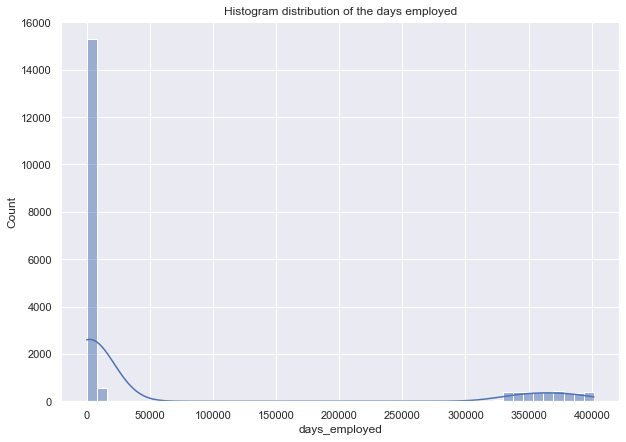

In [21]:
fig, axes= plt.subplots(figsize=(10,7))
sns.histplot(data=df, x='days_employed', bins=50, kde=True)
plt.title('Histogram distribution of the days employed')
plt.show()

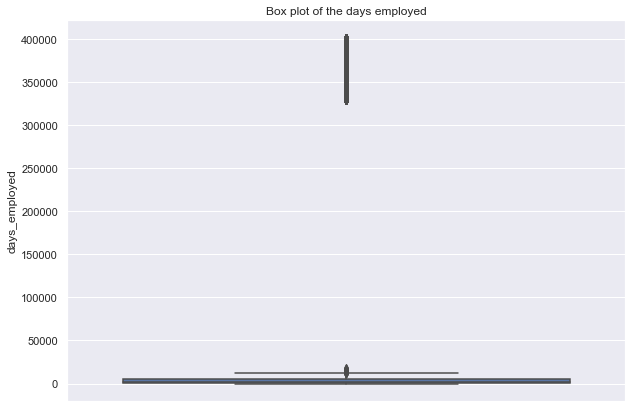

In [22]:
fig, axes= plt.subplots(figsize=(10,7))
sns.boxplot(y=df['days_employed'])
plt.title('Box plot of the days employed')
plt.show()

Both the boxplot and histogram plot confirm the outliers

In [23]:
#number of rows with days employed more than 60years which is 22000] days
len(df.loc[df['days_employed']>22000])

3438

In [24]:
#percentage of rows with days employed more than 60years which is 22000] days
len(df.loc[df['days_employed']>22000])*100/len(df)

16.04817252485646

Number of rows with improbable number of days make up a significant portion of our data and cannot be drop. Define upper boundary and cap the number of days employed at 22000 days, 60years.

In [25]:
#define upper boundary
df['days_employed']=df['days_employed'].apply(lambda x: 22000 if x>22000 else x)

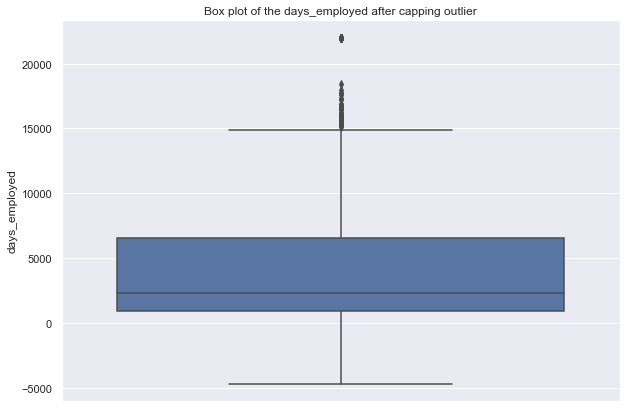

In [54]:
fig, axes= plt.subplots(figsize=(10,7))
sns.boxplot(y=df['days_employed'])
plt.title('Box plot of the days_employed after capping outlier')
plt.show()

Days employed data is not consitent and processed. No wide outlier

#### Futher analyze dob_years column for age 0 

In [28]:
#investigate dob_years columns
df['dob_years'].value_counts()

35    615
40    605
41    604
34    598
38    595
42    594
33    579
39    572
31    557
36    554
29    544
44    543
30    537
48    536
37    534
50    511
43    511
49    508
32    507
28    501
45    497
27    492
52    484
56    484
47    477
54    474
46    470
53    458
58    456
57    454
51    447
59    442
55    442
26    407
60    374
25    357
61    353
62    349
63    268
24    263
64    261
23    252
65    194
22    183
66    182
67    167
21    111
0     101
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [29]:
df[df['dob_years']==0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
99,0,22000.000000,0,secondary education,1,married,0,F,retiree,0,11406.644,car,buy car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions,buy house/real estate
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation,buy house/real estate
578,0,22000.000000,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property,buy house/real estate
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car,buy car
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing,buy house/real estate
20462,0,22000.000000,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house,buy house/real estate
20577,0,22000.000000,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property,buy house/real estate
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate,buy house/real estate


In [30]:
# Percentage of data with age= 0 in dob columns. 
len(df[df['dob_years']==0])/len(df)*100

0.4714559118704197

Rows with age 0 show levels of education and family status and income type. This is an error and such all age entry with 0 will be treated as missing values. These rows are less than 0.5% of the data and is of insignificant proportion and will be dropped.

In [31]:
df=df.drop(index=df[df['dob_years']==0].index)

In [32]:
df['dob_years'].describe()

count    21322.000000
mean        43.486540
std         12.247649
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

#### Fill  missing values in days_employed and total_income using the Iterative Imputer 

In [33]:
imputer=IterativeImputer(random_state=0)
df_fill=imputer.fit_transform(df[['children','dob_years','total_income','days_employed']])

In [34]:
df_fill=pd.DataFrame(df_fill, columns=['children','dob_years','total_income','days_employed'])

In [35]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21322 entries, 0 to 21321
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   children       21322 non-null  float64
 1   dob_years      21322 non-null  float64
 2   total_income   21322 non-null  float64
 3   days_employed  21322 non-null  float64
dtypes: float64(4)
memory usage: 666.4 KB


In [36]:
df['days_employed']= df_fill['days_employed']
df['total_income']=df_fill['total_income']

In [37]:
df.dropna(inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21120 entries, 0 to 21321
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21120 non-null  int64  
 1   days_employed     21120 non-null  float64
 2   dob_years         21120 non-null  int64  
 3   education         21120 non-null  object 
 4   education_id      21120 non-null  int64  
 5   family_status     21120 non-null  object 
 6   family_status_id  21120 non-null  int64  
 7   gender            21120 non-null  object 
 8   income_type       21120 non-null  object 
 9   debt              21120 non-null  int64  
 10  total_income      21120 non-null  float64
 11  purpose           21120 non-null  object 
 12  purpose_category  21120 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [39]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000
mean,0.538873,5868.756898,43.484280,0.817945,0.972112,0.080634,26791.876511
std,1.356625,7579.066771,12.246998,0.548556,1.420304,0.272279,15696.164896
min,0.000000,-4635.849709,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,944.946789,33.000000,1.000000,0.000000,0.000000,17222.623000
50%,0.000000,2366.245640,43.000000,1.000000,0.000000,0.000000,24708.596500
75%,1.000000,6578.220319,53.000000,1.000000,1.000000,0.000000,31319.888750
max,20.000000,22000.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


In [40]:
#percentage of data volume in the original data
df.count().sum() *100/df_int.count().sum()

99.88249546170553

All data preprocessing has been complete and the data is now ready for further exploratory analysis. We have improved our data quality and kept over 99% of the original data.

#### Categorize continuous variables for group analysis

In [41]:
# Let's write a function that calculates the age category
#categorize the dob_years column

def age_category(age):
    if age>60:
        return 5
    elif age>50:
        return 4
    elif age>30:
        return 3
    elif age>21:
        return 2
    else:
        return 1

In [42]:
# Creating new column based on function
df['age_category']=df['dob_years'].apply(age_category)


In [43]:
# Categorizing total_income
def income_category (total_income):
    if total_income<17251:
        return 1
    elif total_income< 23200:
        return 2
    elif total_income< 31281:
        return 3
    else:
        return 4
    
df['income_category']=df['total_income'].apply(income_category)

In [44]:
#categorizing children column
def children_category (child):
    if child==0:
        return 1
    elif child<3:
        return 2
    elif child<6:
        return 3
    else:
        return 4
    
df['children_category']=df['children'].apply(children_category)

In [45]:
df[['days_employed', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt',
       'purpose_category', 'age_category',
       'income_category', 'children_category']]

,days_employed,education_id,family_status_id,gender,income_type,debt,purpose_category,age_category,income_category,children_category
0,8437.673028,0,0,F,employee,0,buy house/real estate,3,4,2
1,4024.803754,1,0,F,employee,0,buy car,3,2,2
2,5623.422610,1,0,M,employee,0,buy house/real estate,3,3,1
3,4124.747207,1,0,M,employee,0,education,3,4,3
4,22000.000000,1,1,F,retiree,0,wedding,4,3,1
...,...,...,...,...,...,...,...,...,...,...
21317,4529.316663,1,0,F,business,0,buy car,3,4,2
21318,22000.000000,1,0,M,business,1,buy house/real estate,2,3,1
21319,2113.346888,1,0,F,employee,0,buy house/real estate,2,1,1
21320,3112.481705,2,0,F,employee,0,buy house/real estate,3,4,1




The dob_year was categoried in the age column based on the age range.
The total_income column was categorized in the income category based on defined income range.
The purpose column was categorized in the purpose category based on related purpose.
The children column was categorised in the children categoru based on no of children.
Every other column has few unique values that are manageable and do not require further categorization.

**Is there a correlation between having children and paying back on time?**

In [46]:
children_stat= df.groupby('children_category')['debt'].agg(('count', 'sum','mean'))
children_stat

,count,sum,mean
children_category,,,
1,13911,1039,0.074689
2,6766,626,0.092521
3,372,30,0.080645
4,71,8,0.112676


In [47]:
children_stat.columns=['count','total_default', 'default_rate']
children_stat['default_rate']=children_stat['default_rate']*100
children_stat

,count,total_default,default_rate
children_category,,,
1,13911,1039,7.468909
2,6766,626,9.252143
3,372,30,8.064516
4,71,8,11.267606


According to this finding applicant with few children (1-3) are more likely default on payment than other categories. Over all customers with kids are more likely to default on payment tha those with no kids

**Is there a correlation between family status and paying back on time?**

In [48]:
family_stat= df.groupby('family_status')['debt'].agg(('count', 'sum','mean'))
family_stat

,count,sum,mean
family_status,,,
civil partnership,4091,380,0.092887
divorced,1170,84,0.071795
married,12154,910,0.074872
unmarried,2760,267,0.096739
widow / widower,945,62,0.065608


In [49]:
family_stat.columns=['count','total_default', 'default_rate']
family_stat['default_rate']=family_stat['default_rate']*100
family_stat

,count,total_default,default_rate
family_status,,,
civil partnership,4091,380,9.288682
divorced,1170,84,7.179487
married,12154,910,7.487247
unmarried,2760,267,9.673913
widow / widower,945,62,6.560847


According to this finding  customer that are unmarried and in civil partnership have are more likely to default on a loan payment

**Is there a correlation between income level and paying back on time?**

In [50]:
income_stat= df.groupby('income_category')['debt'].agg(('count', 'sum','mean'))
income_stat

,count,sum,mean
income_category,,,
1,5299,430,0.081147
2,4231,327,0.077287
3,6295,520,0.082605
4,5295,426,0.080453


In [51]:
income_stat.columns=['count','total_default', 'default_rate']
income_stat['default_rate']=income_stat['default_rate']*100
income_stat

,count,total_default,default_rate
income_category,,,
1,5299,430,8.114739
2,4231,327,7.728669
3,6295,520,8.260524
4,5295,426,8.045326


According to this finding overall, those between 25 to 75percentile of the income range are more likely to default on a loan, while those at the max are far less to default on the loan

**How does credit purpose affect the default rate?**

In [52]:
purpose_stat= df.groupby('purpose_category')['debt'].agg(('count', 'sum','mean'))
purpose_stat

,count,sum,mean
purpose_category,,,
buy car,4232,390,0.092155
buy house/real estate,10634,765,0.071939
education,3959,365,0.092195
wedding,2295,183,0.079739


In [53]:
purpose_stat.columns=['count','total_default', 'default_rate']
purpose_stat['default_rate']=purpose_stat['default_rate']*100
purpose_stat

,count,total_default,default_rate
purpose_category,,,
buy car,4232,390,9.215501
buy house/real estate,10634,765,7.193906
education,3959,365,9.219500
wedding,2295,183,7.973856


According to the finding.  Loan customer's with the purpose of buying a car and education are more likely to defualt on payment

# General Conclusion 


<p>At the end of this project, we have been able to carry out data preprocessing for our client who is trying to analyze a borrower's risk of defaulting in loan repayment.<br>
    
***Preprocessing:***<br>
    
We have significant missing values in the total income and days employed column. Missing values in this columns were equal and dependent, i.e in the same row. We filled missing values in the total income column with the median values based on their age categorizaion. We also filled missing values in days_employed with the median value based on their age categorisation which is  good estimator. The median value was used due to the wide spread of the data<br>.Duplicate values due to text format in the education were correct for. We cleaning the days_employed column and set the max to 50 years to correct for unusally high values coming from some retired customers.Negative values in the day_employed were corrected to the absolute values. Every other problematic data was dropped to increase confidence in the integrity of our data. The final data used for analysis was about 98% of the original dataset.<br>
    
***Analysis*** <br>
We categorized the loan purposes into car purchase, wedding, education and real estate. We categorized total_income based on the percentile they fell under in the income distribution. We also categorized customers based on number of childredn. We grouped by purpose catgeory, family status category, children category, and income category to show the count, number of default and default rate for each group.<br>

***Purpose*** <br>
Customers taking a loan to buy a car have the highest default rate with 9.3% followed closely by education 9.2%. Customers trying to buy/build a house are least likely to default on payment.

Children: Customers with 1-3 children have the highes default rate of 9.2% while those with no children have the lowest default rate of 7.5% 

Family status: Customers that are unmarried and in civil partnership have the highest default rate, 9.7% and 9.2% respectively, while those that are widowed have the lowest default rate of 6.5%

Income category: Customers that are between the 25 to 75 percentile have the highest default rate while those with income about the 75percentile have the lowest default rate of 7.1% <br>
***Recommendation***<br>
Based on this the bank can assess a customer's credit worth. Those in categories of low default rate will be more credit worthy than those in the categories with the highest default rates. The most credit worthy customer will; have no child, be widowed, be above the 75 percentile income and wants the loan for a house. The most risky customer will;want to buy a car, have 1-3 children, be unmarried and earn between the 50 and 75 percentile in income<p>